In [1]:
%matplotlib notebook
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams.update({'figure.autolayout': False})


def read_sqlite(file):
    conn = sqlite3.connect(file)
    try:
        df = pd.read_sql_query('SELECT * FROM result', conn)
    except:
        return None
    finally:
        conn.close()
    return df

In [2]:
vals = [0.1, 0.178, 0.31, 0.562, 1, 1.778, 3.162, 5.623, 10, 17.783, 31.622, 56.234, 100]
dfs = dict(map(lambda x: (x, read_sqlite('results/duckdb_wrapper_tpch1_flip_x_{0:g}_results.sqlite'.format(x))), vals))
# dfs

In [3]:
for val in vals:
    dfs[val]['rate'] = val

In [4]:
merged_df = pd.concat(list(dfs.values()))
# merged_df

In [5]:
df = merged_df.groupby(['result', 'rate']).size().reset_index(name='counts')
# df

In [6]:
for result in range(5):
    for rate in vals:
        if len(df[(df['result'] == result) & (df['rate'] == rate)]) == 0:
            df = df.append({
                'result': result,
                'rate': rate,
                'counts': 0
            }, ignore_index=True)

df['result'] = df['result'].astype(int)
df['counts'] = df['counts'].astype(int)
df.sort_values(['result', 'rate'], inplace=True)
# df

In [7]:
pivoted = pd.pivot_table(df, values='counts', index='rate', columns='result')
pivoted.columns = ['ok', 'incorrect', 'crash', 'abnormal', 'timeout']
pivoted

,ok,incorrect,crash,abnormal,timeout
rate,,,,,
0.100,78212,1585,2513,0,20
0.178,74520,3377,5281,0,28
0.310,69467,5737,9242,0,43
0.562,61110,9449,15851,0,73
1.000,48565,14345,26681,0,167
1.778,31504,18390,42248,0,241
3.162,14337,18521,61270,0,412
5.623,3783,13150,78737,0,619
10.000,399,6051,89935,0,838


In [8]:
pivoted / 97500

,ok,incorrect,crash,abnormal,timeout
rate,,,,,
0.100,0.802174,0.016256,0.025774,0.0,0.000205
0.178,0.764308,0.034636,0.054164,0.0,0.000287
0.310,0.712482,0.058841,0.094790,0.0,0.000441
0.562,0.626769,0.096913,0.162574,0.0,0.000749
1.000,0.498103,0.147128,0.273651,0.0,0.001713
1.778,0.323118,0.188615,0.433313,0.0,0.002472
3.162,0.147046,0.189959,0.628410,0.0,0.004226
5.623,0.038800,0.134872,0.807559,0.0,0.006349
10.000,0.004092,0.062062,0.922410,0.0,0.008595


In [8]:
print(pivoted.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &     ok &  incorrect &  crash &  abnormal &  timeout \\
rate    &        &            &        &           &          \\
\midrule
0.100   &  78212 &       1585 &   2513 &         0 &       20 \\
0.178   &  74520 &       3377 &   5281 &         0 &       28 \\
0.310   &  69467 &       5737 &   9242 &         0 &       43 \\
0.562   &  61110 &       9449 &  15851 &         0 &       73 \\
1.000   &  48565 &      14345 &  26681 &         0 &      167 \\
1.778   &  31504 &      18390 &  42248 &         0 &      241 \\
3.162   &  14337 &      18521 &  61270 &         0 &      412 \\
5.623   &   3783 &      13150 &  78737 &         0 &      619 \\
10.000  &    399 &       6051 &  89935 &         0 &      838 \\
17.783  &      7 &       2944 &  93480 &         0 &     1040 \\
31.622  &      0 &       1643 &  94806 &         0 &     1047 \\
56.234  &      0 &        580 &  96025 &         0 &      889 \\
100.000 &      0 &         84 &  96731 &         0 & 

<IPython.core.display.Javascript object>


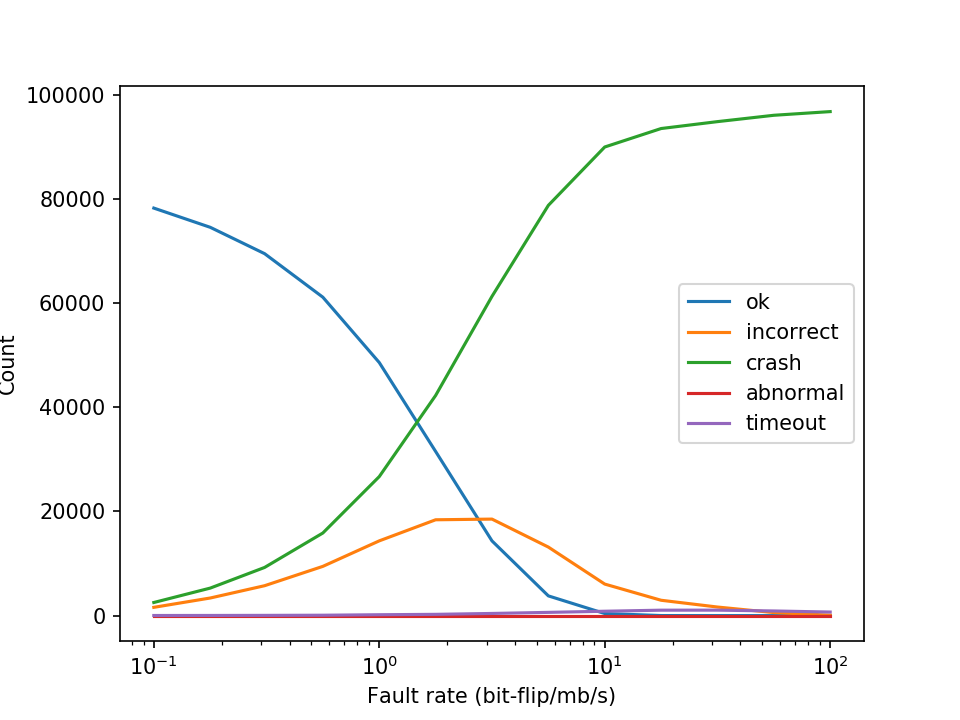

In [9]:
fig = plt.figure()
plt.ylabel('Count')
plt.xlabel('Fault rate (bit-flip/mb/s)')
plt.xscale('log')
plt.plot(vals, pivoted['ok'], label='ok')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


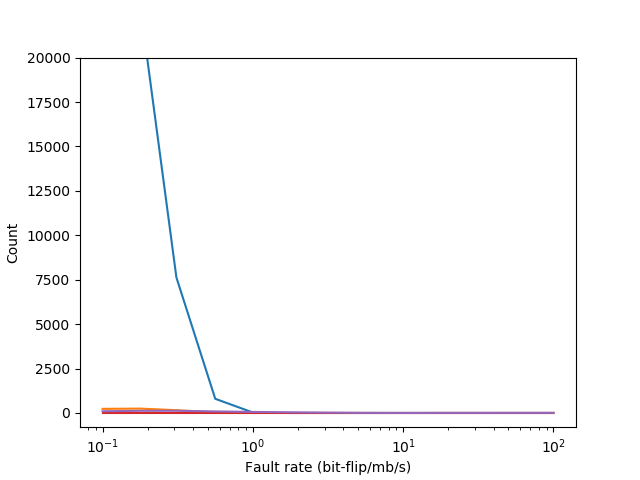

In [10]:
fig = plt.figure()
plt.ylabel('Count')
plt.xlabel('Fault rate (bit-flip/mb/s)')
plt.xscale('log')
plt.plot(vals, pivoted['ok'], label='ok')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.ylim(-800, 20000)
plt.show()

<IPython.core.display.Javascript object>


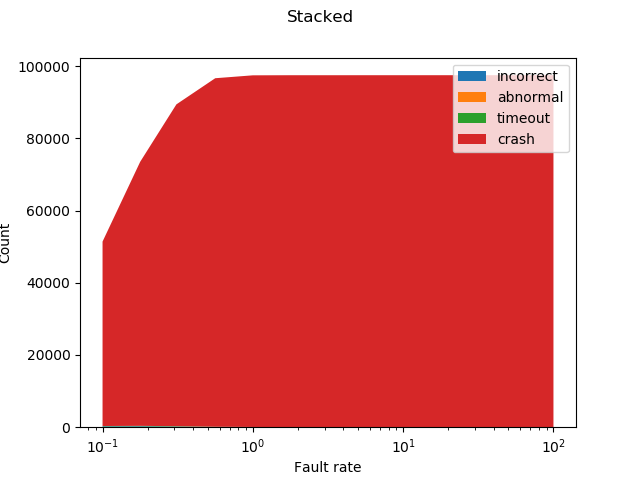

In [11]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              pivoted['crash'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout', 'crash'])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


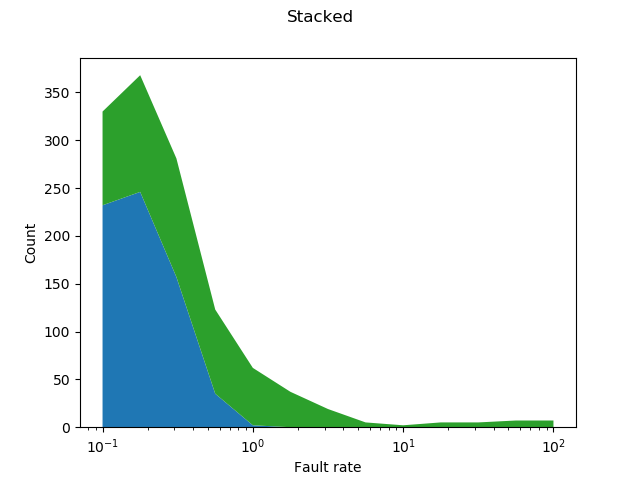

In [12]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout'])
plt.show()

<IPython.core.display.Javascript object>


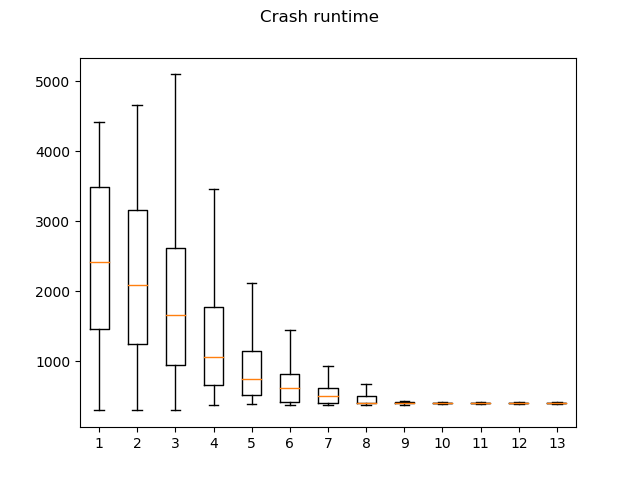

In [13]:
fig = plt.figure()

fig.suptitle('Crash runtime')

df_2 = merged_df[merged_df['result'] == 2]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


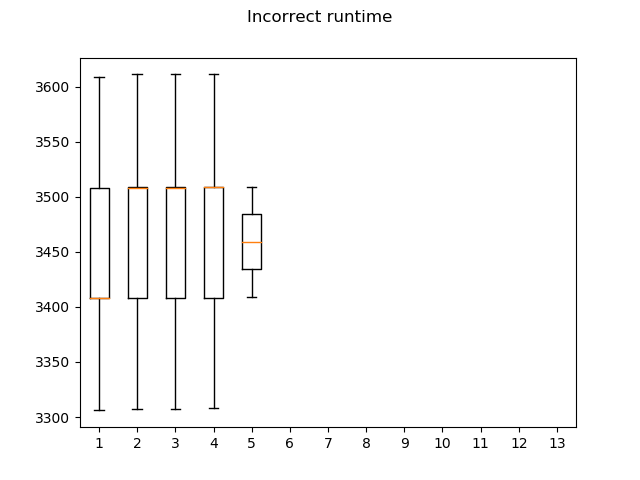

In [14]:
fig = plt.figure()

fig.suptitle('Incorrect runtime')

df_2 = merged_df[merged_df['result'] == 1]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


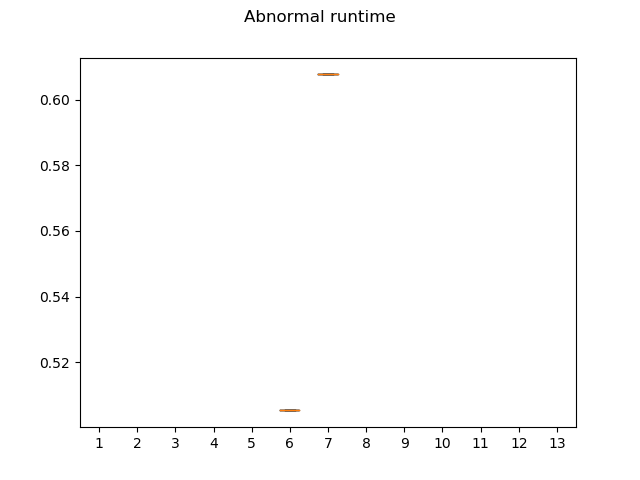

In [11]:
fig = plt.figure()

fig.suptitle('Abnormal runtime')

df_2 = merged_df[merged_df['result'] == 3]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


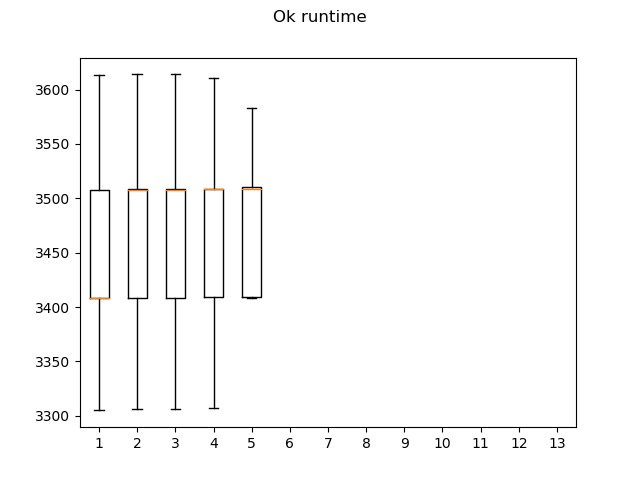

In [15]:
fig = plt.figure()

fig.suptitle('Ok runtime')

df_2 = merged_df[merged_df['result'] == 0]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

In [13]:
crashes = merged_df[merged_df['result'] == 2]
signals = crashes['term_sig'].unique()
crash_count = crashes.groupby(['term_sig', 'rate']).size().reset_index(name='counts')
crash_pivoted = pd.pivot_table(crash_count, values='counts', index='rate', columns='term_sig', fill_value=0)
crash_pivoted

term_sig,4,5,6,7,11
rate,,,,,
0.100,0,0,1004,116,1698
0.178,0,0,2037,250,3757
0.310,0,0,3434,423,6106
0.562,0,0,5849,640,11179
1.000,1,0,9534,1025,18840
1.778,0,0,14633,1508,29775
3.162,0,1,19878,1841,43182
5.623,0,0,22982,1850,58192
10.000,2,0,20709,1234,71592


In [16]:
fig = plt.figure()
fig.suptitle('Crash types')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')

for signal in signals:
    plt.plot(vals, crash_pivoted[signal], label=str(signal))
    
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

NameError: name 'signals' is not defined